In [18]:
# Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn import tree
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

# Show version of scikit-learn
import sklearn
sklearn.__version__

/Users/loic/Documents/data_analytics/Week_09


'1.0.2'

# Load and prepare data

In [19]:
# Define columns for import
columns = [ 'id',
            'bfs_number',
            'bfs_name',
            'lat',
            'lon',
            'brand',
            'pop',
            'pop_dens',
            'frg_pct',
            'emp']

# Read and select variables
df = pd.read_csv("supermarkets_data_enriched.csv", sep=",", encoding='utf-8')[columns]

# Remove missing values
df = df.dropna()
# Remove duplicates
df = df.drop_duplicates()

df.head()

,id,bfs_number,bfs_name,lat,lon,brand,pop,pop_dens,frg_pct,emp
0,33126515,3315,Schänis,47.155616,9.037915,Spar,3876,97.142857,13.054696,1408.0
1,280130028,3315,Schänis,47.155492,9.039666,ALDI,3876,97.142857,13.054696,1408.0
2,6122906632,3315,Schänis,47.158959,9.044477,Denner,3876,97.142857,13.054696,1408.0
3,9019298862,3315,Schänis,47.155185,9.038472,Lidl,3876,97.142857,13.054696,1408.0
4,36726161,3339,Uznach,47.226191,8.980329,Migros,6489,860.610080,27.862537,3500.0


In [20]:
df_sub = df.loc[df['brand'].isin(['Migros', 'Volg'])]
df_sub.head()

,id,bfs_number,bfs_name,lat,lon,brand,pop,pop_dens,frg_pct,emp
4,36726161,3339,Uznach,47.226191,8.980329,Migros,6489,860.610080,27.862537,3500.0
8,48932835,261,Zürich,47.375020,8.522895,Migros,420217,4778.994655,32.458468,491193.0
11,83330862,261,Zürich,47.344749,8.529981,Migros,420217,4778.994655,32.458468,491193.0
12,119249170,261,Zürich,47.375255,8.536107,Migros,420217,4778.994655,32.458468,491193.0
15,262400822,261,Zürich,47.364072,8.530945,Migros,420217,4778.994655,32.458468,491193.0


In [21]:
df_sub['is_migros'] = pd.get_dummies(df_sub, drop_first=False, columns=['brand'])['brand_Migros']
df_sub = df_sub.drop(columns=['brand'])
df_sub.head()

,id,bfs_number,bfs_name,lat,lon,pop,pop_dens,frg_pct,emp,is_migros
4,36726161,3339,Uznach,47.226191,8.980329,6489,860.610080,27.862537,3500.0,1
8,48932835,261,Zürich,47.375020,8.522895,420217,4778.994655,32.458468,491193.0,1
11,83330862,261,Zürich,47.344749,8.529981,420217,4778.994655,32.458468,491193.0,1
12,119249170,261,Zürich,47.375255,8.536107,420217,4778.994655,32.458468,491193.0,1
15,262400822,261,Zürich,47.364072,8.530945,420217,4778.994655,32.458468,491193.0,1


# Classification tree model

In [22]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df_sub[['pop', 
                                                                'pop_dens',
                                                                'frg_pct',
                                                                'emp']], 
                                                                df_sub['is_migros'], 
                                                                test_size=0.20, 
                                                                random_state=42)

# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
         pop      pop_dens    frg_pct       emp
427     1728     17.891903   8.217593     725.0
271   173232   7263.396226  37.955459  185432.0
1149  203951  12810.992462  47.954656  186620.0
2655    4757     35.638298  16.312802    3229.0
2369    6872   4521.052632  26.062282    3185.0 

y_train:
427     0
271     1
1149    1
2655    1
2369    1
Name: is_migros, dtype: uint8


In [23]:
# Initialize the classification tree model 
clf = DecisionTreeClassifier(random_state=20, 
                             max_depth=3)

# Train the classification tree model 
clf = clf.fit(X_train, y_train)

# Make model predictions
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [25]:
# Text representation of the classification tree
text_rep = tree.export_text(clf, 
                            feature_names=list(X_train.columns))

# Print text_representation
print(text_rep)

|--- emp <= 1399.00
|   |--- pop <= 2598.50
|   |   |--- frg_pct <= 18.70
|   |   |   |--- class: 0
|   |   |--- frg_pct >  18.70
|   |   |   |--- class: 0
|   |--- pop >  2598.50
|   |   |--- pop_dens <= 750.01
|   |   |   |--- class: 0
|   |   |--- pop_dens >  750.01
|   |   |   |--- class: 1
|--- emp >  1399.00
|   |--- pop_dens <= 1418.86
|   |   |--- pop_dens <= 28.81
|   |   |   |--- class: 0
|   |   |--- pop_dens >  28.81
|   |   |   |--- class: 1
|   |--- pop_dens >  1418.86
|   |   |--- frg_pct <= 20.66
|   |   |   |--- class: 1
|   |   |--- frg_pct >  20.66
|   |   |   |--- class: 1



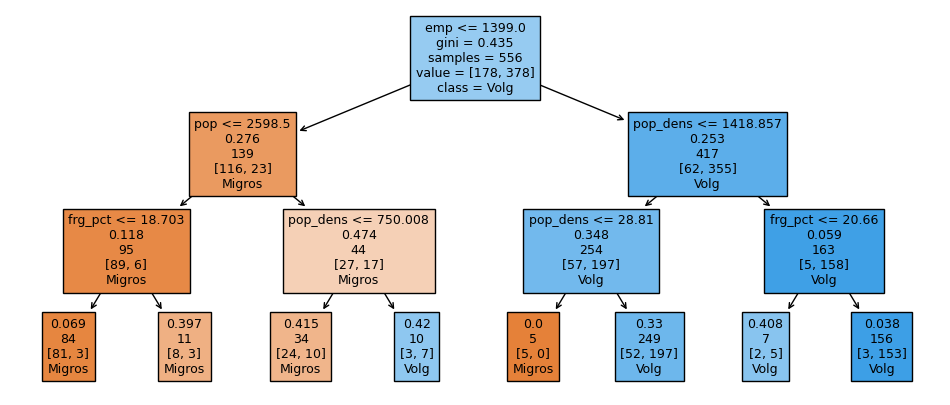

In [27]:
# For the meaning of numbers in boxes see root node
fig = plt.figure(figsize=(12,5))
tree_plot = tree.plot_tree(clf, 
                   feature_names=list(X_train.columns),  
                   class_names=['Migros', 'Volg'],
                   filled=True,
                   fontsize=9,
                   label='root')

In [24]:
# Confusion matrix
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred), '\n')

# Classification report
print('Classification report')
print(classification_report(y_test, y_pred))

Confusion matrix
[[26  6]
 [10 98]] 

Classification report
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        32
           1       0.94      0.91      0.92       108

    accuracy                           0.89       140
   macro avg       0.83      0.86      0.84       140
weighted avg       0.89      0.89      0.89       140



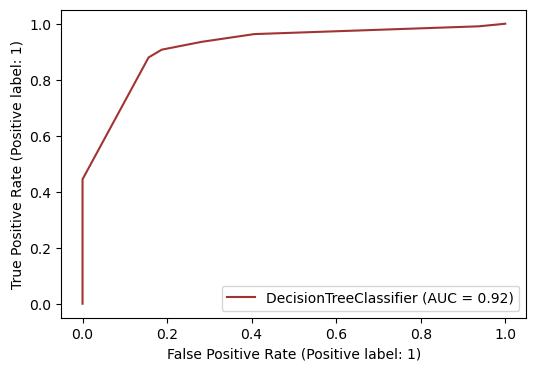

In [29]:
# Plot ROC curve and calculate AUC
plt.figure(figsize=(6,4))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(clf, 
                                          X_test, 
                                          y_test, 
                                          ax=ax,
                                          alpha=0.8,
                                          c="darkred")
plt.show()

# Random Forest Classifier

In [30]:
# Create train and test samples
X2_train, X2_test, y2_train, y2_test = train_test_split(df_sub[['pop', 
                                                                'pop_dens',
                                                                'frg_pct',
                                                                'emp']], 
                                                                df_sub['is_migros'], 
                                                                test_size=0.20, 
                                                                random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
         pop      pop_dens    frg_pct       emp
427     1728     17.891903   8.217593     725.0
271   173232   7263.396226  37.955459  185432.0
1149  203951  12810.992462  47.954656  186620.0
2655    4757     35.638298  16.312802    3229.0
2369    6872   4521.052632  26.062282    3185.0 

y2_train:
427     0
271     1
1149    1
2655    1
2369    1
Name: is_migros, dtype: uint8


In [31]:
# Initialize the random forest classifier
rfc = RandomForestClassifier(random_state=20, max_depth=10)

# Train the random forest classifier
rfc = rfc.fit(X2_train, y2_train)

# Predict the target variable (0 = Volg, 1 = Migros)
y_pred_rf = rfc.predict(X2_test)

print('Predicted target variable (0 = Volg, 1 = Migros)')
y_pred_rf

Predicted target variable (0 = Volg, 1 = Migros)


array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [32]:
# Confusion matrix
print('Confusion matrix')
print(confusion_matrix(y2_test, y_pred_rf), '\n')

# Classification report
print('Classification report')
print(classification_report(y2_test, y_pred_rf))

Confusion matrix
[[28  4]
 [14 94]] 

Classification report
              precision    recall  f1-score   support

           0       0.67      0.88      0.76        32
           1       0.96      0.87      0.91       108

    accuracy                           0.87       140
   macro avg       0.81      0.87      0.83       140
weighted avg       0.89      0.87      0.88       140



Index(['pop', 'emp', 'pop_dens', 'frg_pct'], dtype='object')
[0.35526675 0.32990271 0.16857711 0.14625343]


<AxesSubplot:ylabel='features'>

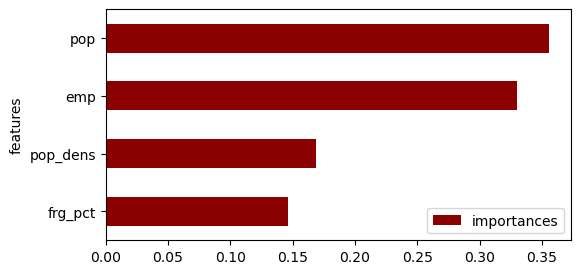

In [33]:
cols = X2_train.columns

# Derive feature importance from random forest
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='darkred', 
           figsize=(6,3))

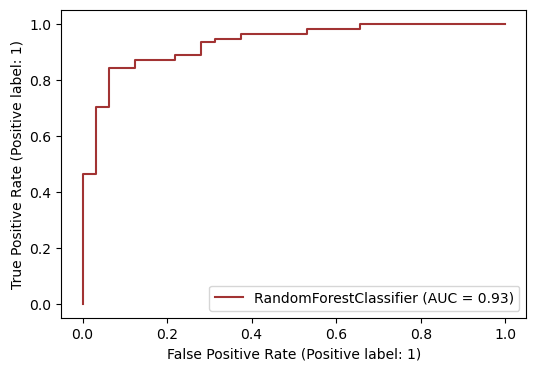

In [34]:
# Plot ROC curve and calculate AUC
plt.figure(figsize=(6,4))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, 
                                          X2_test, 
                                          y2_test, 
                                          ax=ax,
                                          alpha=0.8,
                                          c="darkred")
plt.show()

In [35]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 23.0.0
Datetime: 2023-11-20 20:58:45
Python Version: 3.9.13
-----------------------------------
